# Billionaire DataSet Initial Cleaning and EDA:

## Step 1: Cleaning

The first thing we need to do is look at the data and what we are dealing with. A concern I have straight away is that there will probably be large amounts of data missing due to privacy rights. Thus, we will look at the head of the data first, and then dive right in to see what data is missing. 

In [864]:
#Importing the necessary libraries:
import numpy as np 
import pandas as pd 
import random

In [865]:
#Reading the file:
df = pd.read_csv("Billionaires Statistics Dataset.csv")

In [866]:
#Looking at the data:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [867]:
print("Length of Data (Uncleaned):", len(df))

Length of Data (Uncleaned): 2640


The data has **35 columns and 2640 rows**. Now we can look at how many values are missing:

In [868]:
missing_values_count = df.isnull().sum()
total_missing_values = missing_values_count.sum()
total_missing_values

10812

In [869]:
missing_values_count

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [870]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                           0.000000
finalWorth                                     0.000000
category                                       0.000000
personName                                     0.000000
age                                            2.462121
country                                        1.439394
city                                           2.727273
source                                         0.000000
industries                                     0.000000
countryOfCitizenship                           0.000000
organization                                  87.689394
selfMade                                       0.000000
status                                         0.000000
gender                                         0.000000
birthDate                                      2.878788
lastName                                       0.000000
firstName                                      0.113636
title                                         87

Overall, we have 10812 missing values which is concerning! When we break this down by columns, the majority of the missing data is coming from organization and title (both 87% of the data). Interestingly, we have birth date and then birth year, birth month, and birth day. Since these are all related I am going to deal with this first and then get back to the other values. 

I want to see what format the birthDate column is in first:

In [871]:
df['birthDate'].head()

0     3/5/1949 0:00
1    6/28/1971 0:00
2    1/12/1964 0:00
3    8/17/1944 0:00
4    8/30/1930 0:00
Name: birthDate, dtype: object

In [872]:
df['birthDate'].tail()

2635    12/14/1971 0:00
2636     3/10/1943 0:00
2637    12/18/1962 0:00
2638     8/21/1951 0:00
2639     11/1/1956 0:00
Name: birthDate, dtype: object

Since the birthDate column is in object form I am going to set it to pd.to_datetime before dealing with the missing values. 

In [873]:
df['birthDate'] = pd.to_datetime(df['birthDate'])

In [874]:
df['birthDate'].head()

0   1949-03-05
1   1971-06-28
2   1964-01-12
3   1944-08-17
4   1930-08-30
Name: birthDate, dtype: datetime64[ns]

In [875]:
df['birthDate'].tail()

2635   1971-12-14
2636   1943-03-10
2637   1962-12-18
2638   1951-08-21
2639   1956-11-01
Name: birthDate, dtype: datetime64[ns]

### Manually Filling Birth Date For NaN Values:

We can now see the date is in Year-Month0Day format. In order to look at all of the individuals with missing birthdates I am now going to create a mask and then download the file to a CSV and manually look at the individuals. From here I will use python to manually fill in the missing Birth Dates. 

In [876]:
# Create a mask where birthDate is NaN
missing_birthdate_mask = df['birthDate'].isnull()

# Use the mask to filter the DataFrame
missing_birthdates = df[missing_birthdate_mask]

# Extract the personName column
names_with_missing_birthdates = missing_birthdates['personName']
names_with_missing_birthdates

107      Karl Albrecht Jr. & family
108                   Beate Heister
247     Francine von Finck & family
423                     Zhou Qunfei
550                Zhu Yan & family
                   ...             
2453                  Michaela Herz
2550                 Chang Kuo-Ming
2603              Gabriella Meister
2609                   Réal Plourde
2625         Wang Jianfeng & family
Name: personName, Length: 76, dtype: object

In [877]:
names_with_missing_birthdates.to_csv('/Users/aliciawilson/Downloads/missing_birthdates.csv', index=False)

Now we have the file you can see me filling in the individuals with missing birthdates according to the dates I have found online (through Forbes and the internet as a whole):

In [878]:
beate_heister_row = df['personName'] == 'Beate Heister'
df.loc[beate_heister_row, 'birthDate'] = pd.Timestamp('1951-10-05')
print(df[df['personName'] == 'Beate Heister'][['personName', 'birthDate']])

        personName  birthDate
108  Beate Heister 1951-10-05


In [879]:
francine_von_finck_row = df['personName'] == 'Francine von Finck & family'
df.loc[francine_von_finck_row, 'birthDate'] = pd.Timestamp('1968-05-02')
print(df[df['personName'] == 'Francine von Finck & family'][['personName', 'birthDate']])

                      personName  birthDate
247  Francine von Finck & family 1968-05-02


In [880]:
zhu_yan_family_row = df['personName'] == 'Zhu Yan & family'
df.loc[zhu_yan_family_row, 'birthDate'] = pd.Timestamp('1993-11-07')
print(df[df['personName'] == 'Zhu Yan & family'][['personName', 'birthDate']])

           personName  birthDate
550  Zhu Yan & family 1993-11-07


In [881]:
marcos_galperin_row = df['personName'] == 'Marcos Galperin'
df.loc[marcos_galperin_row, 'birthDate'] = pd.Timestamp('1971-10-31')
print(df[df['personName'] == 'Marcos Galperin'][['personName', 'birthDate']])

          personName  birthDate
554  Marcos Galperin 1971-10-31


In [882]:
#Doing the same for these individuals:
karin_sartorius_herbst_row = df['personName'] == 'Karin Sartorius-Herbst'
df.loc[karin_sartorius_herbst_row, 'birthDate'] = pd.Timestamp('1965-06-14')

xue_hua_row = df['personName'] == 'Xue Hua'
df.loc[xue_hua_row, 'birthDate'] = pd.Timestamp('1947-09-17')

dong_jingwei_row = df['personName'] == 'Dong Jingwei'
df.loc[dong_jingwei_row, 'birthDate'] = pd.Timestamp('1963-11-18')

chan_tan_ching_fen_row = df['personName'] == 'Chan Tan Ching-fen'
df.loc[chan_tan_ching_fen_row, 'birthDate'] = pd.Timestamp('1923-08-23')

sebastian_glaser_row = df['personName'] == 'Sebastian Glaser'
df.loc[sebastian_glaser_row, 'birthDate'] = pd.Timestamp('1978-09-28')

benjamin_otto_row = df['personName'] == 'Benjamin Otto'
df.loc[benjamin_otto_row, 'birthDate'] = pd.Timestamp('1975-06-09')

ulrike_baro_row = df['personName'] == 'Ulrike Baro'
df.loc[ulrike_baro_row, 'birthDate'] = pd.Timestamp('1985-10-16')

timm_oberwelland_row = df['personName'] == 'Timm Oberwelland'
df.loc[timm_oberwelland_row, 'birthDate'] = pd.Timestamp('1969-11-04')

jianping_lai_row = df['personName'] == 'Jianping Lai'
df.loc[jianping_lai_row, 'birthDate'] = pd.Timestamp('1956-12-07')

augusto_perfetti_row = df['personName'] == 'Augusto Perfetti'
df.loc[augusto_perfetti_row, 'birthDate'] = pd.Timestamp('1946-08-11')

martin_bouygues_row = df['personName'] == 'Martin Bouygues'
df.loc[martin_bouygues_row, 'birthDate'] = pd.Timestamp('1952-05-03')

melissa_ma_row = df['personName'] == 'Melissa Ma'
df.loc[melissa_ma_row, 'birthDate'] = pd.Timestamp('1980-04-21')

shu_ping_row = df['personName'] == 'Shu Ping'
df.loc[shu_ping_row, 'birthDate'] = pd.Timestamp('1918-07-18')

manas_chiaravanond_row = df['personName'] == 'Manas Chiaravanond'
df.loc[manas_chiaravanond_row, 'birthDate'] = pd.Timestamp('1965-01-01')

dong_fan_row = df['personName'] == 'Dong Fan'
df.loc[dong_fan_row, 'birthDate'] = pd.Timestamp('1994-03-31')

fritz_draexlmaier_row = df['personName'] == 'Fritz Draexlmaier'
df.loc[fritz_draexlmaier_row, 'birthDate'] = pd.Timestamp('1955-06-02')

somsri_lamsam_row = df['personName'] == 'Somsri Lamsam'
df.loc[somsri_lamsam_row, 'birthDate'] = pd.Timestamp('1959-05-15')

shao_jianxiong_row = df['personName'] == 'Shao Jianxiong'
df.loc[shao_jianxiong_row, 'birthDate'] = pd.Timestamp('1963-12-30')

lai_jianfa_row = df['personName'] == 'Lai Jianfa'
df.loc[lai_jianfa_row, 'birthDate'] = pd.Timestamp('1969-04-21')

lu_di_row = df['personName'] == 'Lu Di'
df.loc[lu_di_row, 'birthDate'] = pd.Timestamp('1975-10-15')

anne_marie_see_pastor_row = df['personName'] == 'Anne Marie See Pastor'
df.loc[anne_marie_see_pastor_row, 'birthDate'] = pd.Timestamp('1968-02-29')

george_pastor_row = df['personName'] == 'George Pastor'
df.loc[george_pastor_row, 'birthDate'] = pd.Timestamp('1963-11-23')

xu_zhenhua_row = df['personName'] == 'Xu Zhenhua'
df.loc[xu_zhenhua_row, 'birthDate'] = pd.Timestamp('1979-01-24')

lillyn_teh_li_hua_row = df['personName'] == 'Lillyn Teh Li Hua'
df.loc[lillyn_teh_li_hua_row, 'birthDate'] = pd.Timestamp('1980-11-14')

zong_yanmin_row = df['personName'] == 'Zong Yanmin'
df.loc[zong_yanmin_row, 'birthDate'] = pd.Timestamp('1964-11-01')

christine_knauf_row = df['personName'] == 'Christine Knauf'
df.loc[christine_knauf_row, 'birthDate'] = pd.Timestamp('1981-08-02')

karl_knauf_row = df['personName'] == 'Karl Knauf'
df.loc[karl_knauf_row, 'birthDate'] = pd.Timestamp('1909-03-27')

francesco_saputo_row = df['personName'] == 'Francesco Saputo'
df.loc[francesco_saputo_row, 'birthDate'] = pd.Timestamp('1909-07-06')

wang_fuji_row = df['personName'] == 'Wang Fuji'
df.loc[wang_fuji_row, 'birthDate'] = pd.Timestamp('1987-01-18')

carmen_daurella_aguilera_row = df['personName'] == 'Carmen Daurella Aguilera'
df.loc[carmen_daurella_aguilera_row, 'birthDate'] = pd.Timestamp('1954-08-20')

philip_green_row = df['personName'] == 'Philip Green'
df.loc[philip_green_row, 'birthDate'] = pd.Timestamp('1952-03-15')

michael_herz_row = df['personName'] == 'Michael Herz'
df.loc[michael_herz_row, 'birthDate'] = pd.Timestamp('1943-09-28')

**Individuals without a birthDate and only birthYear on the internet:**

- Karl Albrecht Jr. & family
- Zhou Qunfei
- Abdulla bin Ahmad Al Ghurair & family
- Maren Otto
- Christiane Schoeller
- Pan Laican
- Li Haiyan
- Giorgio Perfetti
- Maike Oberwelland-Height
- Karin Schick
- Tang Rui
- Zhang Hong
- Li Jinyang
- Tadako Nakatani
- William Teh Lee Pang
- Cai Hongbin
- Ruben Feffer
- Cristina Green
- Wang Jianfeng & family

I am going to fill in **random birth dates for these individuals** but **keep their birthYear** that I have found online. 

In [883]:
# Randomly generate a day and month while keeping the year 1948
day = random.randint(1, 31)  # Generate a random day between 1 and 31
month = random.randint(1, 12)  # Generate a random month between 1 and 12 (you can restrict it further)

birthDate = f'1948-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Karl Albrecht Jr. & family", 'birthDate'] = birthDate
print(df[df['personName'] == 'Karl Albrecht Jr. & family'][['personName', 'birthDate']])

                     personName  birthDate
107  Karl Albrecht Jr. & family 1948-04-20


In [884]:
# Randomly generate a day and month while keeping the year 1948
day = random.randint(1, 31)  # Generate a random day between 1 and 31
month = random.randint(1, 12)  # Generate a random month between 1 and 12 (you can restrict it further)

birthDate = f'1970-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Zhou Qunfei", 'birthDate'] = birthDate
print(df[df['personName'] == 'Zhou Qunfei'][['personName', 'birthDate']])

      personName  birthDate
423  Zhou Qunfei 1970-05-31


In [885]:
# Randomly generate a day and month while keeping the year 1948
day = random.randint(1, 31)  # Generate a random day between 1 and 31
month = random.randint(1, 12)  # Generate a random month between 1 and 12 (you can restrict it further)

birthDate = f'1930-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Abdulla bin Ahmad Al Ghurair & family", 'birthDate'] = birthDate
print(df[df['personName'] == 'Abdulla bin Ahmad Al Ghurair & family'][['personName', 'birthDate']])

                                personName  birthDate
981  Abdulla bin Ahmad Al Ghurair & family 1930-04-25


In [886]:
# Randomly generate a day and month while keeping the year 1948
day = random.randint(1, 31)  # Generate a random day between 1 and 31
month = random.randint(1, 12)  # Generate a random month between 1 and 12 (you can restrict it further)

birthDate = f'1949-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Maren Otto", 'birthDate'] = birthDate

In [887]:
# Randomly generate a day and month while keeping the year 1948
day = random.randint(1, 31)  # Generate a random day between 1 and 31
month = random.randint(1, 12)  # Generate a random month between 1 and 12 (you can restrict it further)

birthDate = f'1968-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Christiane Schoeller", 'birthDate'] = birthDate

In [888]:
day = random.randint(1, 31)  # Generate a random day between 1 and 31
month = random.randint(1, 12)  # Generate a random month between 1 and 12 (you can restrict it further)

birthDate = f'1932-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Pan Laican", 'birthDate'] = birthDate

In [889]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1962-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Li Haiyan", 'birthDate'] = birthDate

In [890]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1932-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Giorgio Perfetti", 'birthDate'] = birthDate

In [891]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1963-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Maike Oberwelland-Height", 'birthDate'] = birthDate

In [892]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1983-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Karin Schick", 'birthDate'] = birthDate

In [893]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1992-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Tang Rui", 'birthDate'] = birthDate

In [894]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1972-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Zhang Hong", 'birthDate'] = birthDate

In [895]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1958-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Li Jinyang", 'birthDate'] = birthDate

In [896]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1929-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Tadako Nakatani", 'birthDate'] = birthDate

In [897]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1967-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "William Teh Lee Pang", 'birthDate'] = birthDate

In [898]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1967-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "William Teh Lee Pang", 'birthDate'] = birthDate

In [899]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1981-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Cai Hongbin", 'birthDate'] = birthDate

In [900]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1956-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Ruben Feffer", 'birthDate'] = birthDate

In [901]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1956-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Ruben Feffer", 'birthDate'] = birthDate

In [902]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1949-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Cristina Green", 'birthDate'] = birthDate

In [903]:
day = random.randint(1, 31)  
month = random.randint(1, 12)  
birthDate = f'1961-{month:02d}-{day:02d}'  # Using f-strings to format the date
df.loc[df['personName'] == "Wang Jianfeng & family", 'birthDate'] = birthDate

**Individuals without a birthDate and no information on birthdate on the internet:**
- Somurai Jaruphnit
- Karen Virginia Beckmann Legoretta
- Anna Katharina Viessmann
- Lam Wai-ying
- Chen Qiongxiang
- Chen Kaichen
- Bai Baokun
- Tseng Sing-ai
- Tan Lili
- Justin Yuan
- Guan Yihong
- Charlwin Mao
- Lillian Teh Li Ming
- Diana Teh Li Shing
- Hugo Ribeiro & family
- Christian Herz
- Chang Kuo-Ming
- Gabriella Meister
- Réal Plourde
- Dong Jinggui

I am going to look at these individuals manually and see how many missing values there are. If there are individuals with many values missing I am going to remove them from the dataset. 

In [904]:
# List of names you want to view
names_to_view = [
    "Somurai Jaruphnit",
    "Karen Virginia Beckmann Legoretta",
    "Anna Katharina Viessmann",
    "Lam Wai-ying",
    "Chen Qiongxiang",
    "Chen Kaichen",
    "Bai Baokun",
    "Tseng Sing-ai",
    "Tan Lili",
    "Justin Yuan",
    "Guan Yihong",
    "Charlwin Mao",
    "Lillian Teh Li Ming",
    "Diana Teh Li Shing",
    "Hugo Ribeiro & family",
    "Christian Herz",
    "Chang Kuo-Ming",
    "Gabriella Meister",
    "Réal Plourde"
]

# Use boolean indexing to filter the DataFrame for the specified names
filtered_df = df[df['personName'].isin(names_to_view)]

# Display the filtered DataFrame with all columns
filtered_df

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
731,721,3900,Diversified,Somurai Jaruphnit,NaN,Thailand,Bangkok,Diversified,Diversified,Thailand,...,0.7,"$543,649,976,166",49.3,99.8,76.9,14.9,29.5,6.962558e+07,15.870032,100.992541
904,905,3200,Food & Beverage,Karen Virginia Beckmann Legoretta,53.0,NaN,NaN,Tequila,Food & Beverage,Mexico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1211,1164,2600,Manufacturing,Anna Katharina Viessmann,NaN,Germany,Battenberg,Heating and cooling equipment,Manufacturing,Germany,...,1.4,"$3,845,630,030,824",70.2,104.0,80.9,11.5,48.8,8.313280e+07,51.165691,10.451526
1468,1434,2100,Manufacturing,Lam Wai-ying,NaN,Hong Kong,Hong Kong,Smartphone screens,Manufacturing,Hong Kong,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1584,1575,1900,Energy,Chen Qiongxiang,NaN,China,Ningde,Batteries,Energy,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
1731,1725,1700,Manufacturing,Chen Kaichen,NaN,China,Guangzhou,Household chemicals,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
1809,1804,1600,Manufacturing,Bai Baokun,53.0,China,Dongguan,Hardware,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
1879,1804,1600,Manufacturing,Tseng Sing-ai,NaN,Taiwan,NaN,Petrochemicals,Manufacturing,Taiwan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,1905,1500,Food & Beverage,Tan Lili,NaN,China,Guangzhou,Feed,Food & Beverage,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2015,1905,1500,Media & Entertainment,Justin Yuan,NaN,China,Shanghai,Online games,Media & Entertainment,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


**Individuals with very little information (who will be dropped from my data):**
- Karen Virginia Beckmann Legoretta
- Lam Wai-ying
- Tseng Sing-ai
- Lillian Teh Li Ming
- Diana Teh Li Shing
- Chang Kuo-Ming
- Cho Jyh-jer
- Gabriella Meister

In [905]:
# List of individuals to drop
individuals_to_drop = [
    "Karen Virginia Beckmann Legoretta",
    "Lam Wai-ying",
    "Tseng Sing-ai",
    "Lillian Teh Li Ming",
    "Diana Teh Li Shing",
    "Chang Kuo-Ming", "Cho Jyh-jer",
    "Somurai Jaruphnit", "Gabriella Meister"
]

# Use boolean indexing to filter the DataFrame and keep rows where 'personName' is not in the list of individuals to drop
df = df[~df['personName'].isin(individuals_to_drop)]

Now we have the remaining individuals with no known birthdate or information from the internet. These remaining individuals (16 of them) will have random birthDates.


In [906]:
# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    # Check if 'birthDate' is missing (NaN)
    if pd.isna(row['birthDate']):
        # Generate a random year between 1900 and 2023 (adjust the range as needed)
        random_year = random.randint(1920, 2023)
        
        # Generate a random month and day (you can adjust the range as needed)
        random_month = random.randint(1, 12)
        random_day = random.randint(1, 31)
        
        # Create the birthDate string in the format 'YYYY-MM-DD'
        random_birthDate = f'{random_year}-{random_month:02d}-{random_day:02d}'
        
        # Assign the random birthDate to the DataFrame
        df.at[index, 'birthDate'] = random_birthDate


Now we can check if there are any missing birthDate values:

In [907]:
# Assuming your DataFrame is named df
# Count missing values in the 'birthDate' column
missing_birth_dates = df['birthDate'].isna().sum()

# Print the number of missing birth dates
print("Number of missing birth dates:", missing_birth_dates)

# Drop rows with missing values in the 'birthDate' column
df = df.dropna(subset=['birthDate'])


Number of missing birth dates: 0


In [908]:
# Assuming your DataFrame is named df

# Find rows with missing values in the 'birthDate' column
missing_birth_dates = df[df['birthDate'].isna()]

# Print the rows with missing 'birthDate' values and their corresponding names
print("Rows with Missing Birth Dates:")
print(missing_birth_dates[['personName', 'birthDate']].head(2))

Rows with Missing Birth Dates:
Empty DataFrame
Columns: [personName, birthDate]
Index: []


### Dealing with NaN Values for birthYear, birthMonth, birthDay:

Since birthYear, Month, and Day are all related to the birthDate we are going to drop these columns altogether. When we are in SQL we will separate out the birthDate, but for now, since the purpose is just cleaning we will drop the columns. 

In [909]:
# Drop the 'birthYear', 'birthMonth', and 'birthDay' columns from the DataFrame
df = df.drop(['birthYear', 'birthMonth', 'birthDay'], axis=1)

In [910]:
missing_values_count_update = df.isnull().sum()
total_missing_values_update = missing_values_count_update.sum()
total_missing_values_update

10380

Now we are going to look at the missing values again, as a percentage of the data (notice how birthDate is now zero!)

In [911]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                           0.000000
finalWorth                                     0.000000
category                                       0.000000
personName                                     0.000000
age                                            2.166477
country                                        1.292284
city                                           2.546560
source                                         0.000000
industries                                     0.000000
countryOfCitizenship                           0.000000
organization                                  87.685291
selfMade                                       0.000000
status                                         0.000000
gender                                         0.000000
birthDate                                      0.000000
lastName                                       0.000000
firstName                                      0.114025
title                                         87

Interestingly, first name is missing. I am going to take a look at this:

In [912]:
# Assuming your DataFrame is named df
# Create a boolean mask to identify rows with missing first names
missing_first_names_mask = df['firstName'].isna()

# Use the mask to filter the DataFrame and get rows with missing first names
missing_first_names_df = df[missing_first_names_mask]

# Print the DataFrame containing missing first names
print("People with missing first names:")
missing_first_names_df


People with missing first names:


,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
676,659,4200,Diversified,Tahir & family,71.0,Indonesia,Jakarta,Diversified,Diversified,Indonesia,...,3.0,"$1,119,190,780,753",36.3,106.4,71.5,10.2,30.1,270203917.0,-0.789275,113.921327
1240,1217,2500,Media & Entertainment,Jay-Z,53.0,United States,New York,Music,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2095,2020,1400,Fashion & Retail,Rihanna,35.0,United States,Los Angeles,"Music, cosmetics",Fashion & Retail,Barbados,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


We can easily fill these three NaN values! (note, for Rhianna and Jay-Z I have replaced their last names too with their full real name). 

Since the personName now does not match up to first and last name, I am going to keep all of these columns. 

In [913]:
df.at[676, 'firstName'] = "Dato' Sri Tahir"
df.at[1240, 'firstName'] = "Shawn Corey"
df.at[1240, 'lastName'] = "Carter"
df.at[2095, 'firstName'] = "Robyn Rihanna"
df.at[2095, 'lastName'] = "Fenty"

In [914]:
# Count the missing first names in the 'firstName' column
missing_first_names_count = df['firstName'].isna().sum()

# Print the count of missing first names
print("Number of missing first names:", missing_first_names_count)

Number of missing first names: 0


### Dealing with NaN Values for Age:
Since we have the birthDate, I am going to use this to calculate the age as of the 1st of January, 2023. I am going to first drop the data column, and then reintroduce it using the filled birthDate column. 


In [915]:
df = df.drop(['age'], axis=1)

In [916]:
# Assuming your DataFrame is named df
from datetime import datetime

# Convert 'birthDate' column to datetime if it's not already
df['birthDate'] = pd.to_datetime(df['birthDate'], errors='coerce')

# Calculate the age as of 1 Jan 2023
df['Age as of 1 Jan 2023'] = 2023 - df['birthDate'].dt.year

# Print the DataFrame with the new column
df[:2]

,rank,finalWorth,category,personName,country,city,source,industries,countryOfCitizenship,organization,...,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,Age as of 1 Jan 2023
0,1,211000,Fashion & Retail,Bernard Arnault & family,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,...,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,74
1,2,180000,Automotive,Elon Musk,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,...,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,52


In [917]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                           0.000000
finalWorth                                     0.000000
category                                       0.000000
personName                                     0.000000
country                                        1.292284
city                                           2.546560
source                                         0.000000
industries                                     0.000000
countryOfCitizenship                           0.000000
organization                                  87.685291
selfMade                                       0.000000
status                                         0.000000
gender                                         0.000000
birthDate                                      0.000000
lastName                                       0.000000
firstName                                      0.000000
title                                         87.153174
date                                           0

### Dealing with title and organization:

These two columns are extremely problemmatic since there are 87% of values missing for each column. Moreover, I do not want to assign random values to this, or manually look at each role because this is incredibly time consuming and complex. To demonstrate my hesitancy, view the screenshot below:

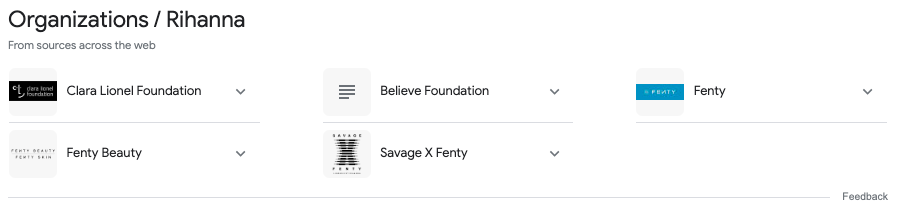

Rhianna is one of our Billionaires and her organization is unstated. This is because she has so many organizations to her name, such as her music, Fenty Beauty, Savage X Fenty (Underwear), and more... 

Her role in each will be different too. I also think it is safe to assume that most of these Billionaires were founders/CEOs due to their mass wealth! For this reason I am going to drop these columns. 

In [918]:
df = df.drop(['organization'], axis=1)
df = df.drop(['title'], axis=1)

In [919]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                           0.000000
finalWorth                                     0.000000
category                                       0.000000
personName                                     0.000000
country                                        1.292284
city                                           2.546560
source                                         0.000000
industries                                     0.000000
countryOfCitizenship                           0.000000
selfMade                                       0.000000
status                                         0.000000
gender                                         0.000000
birthDate                                      0.000000
lastName                                       0.000000
firstName                                      0.000000
date                                           0.000000
state                                         71.379704
residenceStateRegion                          71

In [920]:
missing_values_count_update = df.isnull().sum()
total_missing_values_update = missing_values_count_update.sum()
total_missing_values_update

5720

**Checkpoint:** We have now cut our missing values in half, BUT we still have 5720 missing values... 

### Dealing with country NaN values:

In [921]:
missing_country_df = df[df['country'].isna()]

# Extract the relevant columns for viewing
relevant_columns = ['personName', 'city', 'countryOfCitizenship']

# Display the rows with missing 'country' values along with relevant columns
missing_country_df[relevant_columns][:3]

,personName,city,countryOfCitizenship
108,Beate Heister,NaN,Germany
422,Sunil Mittal,NaN,India
646,Ian Livingstone,NaN,United Kingdom


For each of these values I am going to fill country with the same country that is assigned to the country of citizenship!

In [922]:
# Fill missing 'country' values with values from 'countryOfCitizenship' where available
df['country'] = df.apply(lambda row: row['countryOfCitizenship'] if pd.isna(row['country']) else row['country'], axis=1)

In [923]:
country_nan_count = df['country'].isna().sum()
print("Number of NaN values in the 'country' column:", country_nan_count)

Number of NaN values in the 'country' column: 0


### Dealing with city NaN values:

In [924]:
missing_city_df = df[df['city'].isna()]
relevant_columns = ['personName', 'city', 'countryOfCitizenship']
missing_city_df[relevant_columns][:10]

,personName,city,countryOfCitizenship
32,Li Ka-shing,NaN,Hong Kong
107,Karl Albrecht Jr. & family,NaN,Germany
108,Beate Heister,NaN,Germany
266,Eric Wittouck,NaN,Belgium
343,Alejandro Bailleres Gual & family,NaN,Mexico
422,Sunil Mittal,NaN,India
425,Rene Benko,NaN,Austria
454,Maria Angelicoussis,NaN,Greece
610,Juan Domingo Beckmann Legorreta & family,NaN,Mexico
646,Ian Livingstone,NaN,United Kingdom


In [925]:
unique_countries_with_billionaires = df['countryOfCitizenship'].unique()
unique_countries_with_billionaires

array(['France', 'United States', 'Mexico', 'India', 'Spain', 'China',
       'Canada', 'Germany', 'Italy', 'Hong Kong', 'Austria', 'Japan',
       'Switzerland', 'Australia', 'Indonesia', 'Russia', 'Chile',
       'United Kingdom', 'Israel', 'Brazil', 'Czech Republic',
       'Singapore', 'Sweden', 'Thailand', 'Netherlands', 'Nigeria',
       'Cyprus', 'Malaysia', 'United Arab Emirates', 'South Africa',
       'New Zealand', 'Philippines', 'Monaco', 'Belgium', 'South Korea',
       'Taiwan', 'Norway', 'Egypt', 'Denmark', 'Ireland',
       'Eswatini (Swaziland)', 'Colombia', 'Poland', 'Ukraine', 'Greece',
       'Turkey', 'Argentina', 'Georgia', 'Portugal', 'Kazakhstan',
       'Algeria', 'Venezuela', 'Vietnam', 'Finland', 'Belize', 'Lebanon',
       'Oman', 'Iceland', 'Guernsey', 'Liechtenstein', 'Bulgaria',
       'Romania', 'Zimbabwe', 'Qatar', 'Nepal', 'Slovakia', 'Morocco',
       'Hungary', 'Tanzania', 'Peru', 'Barbados', 'Macau', 'Estonia',
       'St. Kitts and Nevis', 'Armenia

In [926]:
capital_cities = {
    'France': 'Paris',
    'United States': 'Washington, D.C.',
    'Mexico': 'Mexico City',
    'India': 'New Delhi',
    'Spain': 'Madrid',
    'China': 'Beijing',
    'Canada': 'Ottawa',
    'Germany': 'Berlin',
    'Italy': 'Rome',
    'Hong Kong': 'Hong Kong',
    'Austria': 'Vienna',
    'Japan': 'Tokyo',
    'Switzerland': 'Bern',
    'Australia': 'Canberra',
    'Indonesia': 'Jakarta',
    'Russia': 'Moscow',
    'Chile': 'Santiago',
    'United Kingdom': 'London',
    'Israel': 'Jerusalem',
    'Brazil': 'Brasília',
    'Czech Republic': 'Prague',
    'Singapore': 'Singapore',
    'Sweden': 'Stockholm',
    'Thailand': 'Bangkok',
    'Netherlands': 'Amsterdam',
    'Nigeria': 'Abuja',
    'Cyprus': 'Nicosia',
    'Malaysia': 'Kuala Lumpur',
    'United Arab Emirates': 'Abu Dhabi',
    'South Africa': 'Pretoria',
    'New Zealand': 'Wellington',
    'Philippines': 'Manila',
    'Monaco': 'Monaco',
    'Belgium': 'Brussels',
    'South Korea': 'Seoul',
    'Taiwan': 'Taipei',
    'Norway': 'Oslo',
    'Egypt': 'Cairo',
    'Denmark': 'Copenhagen',
    'Ireland': 'Dublin',
    'Eswatini (Swaziland)': 'Mbabane',
    'Colombia': 'Bogotá',
    'Poland': 'Warsaw',
    'Ukraine': 'Kyiv',
    'Greece': 'Athens',
    'Turkey': 'Ankara',
    'Argentina': 'Buenos Aires',
    'Georgia': 'Tbilisi',
    'Portugal': 'Lisbon',
    'Kazakhstan': 'Nur-Sultan',
    'Algeria': 'Algiers',
    'Venezuela': 'Caracas',
    'Vietnam': 'Hanoi',
    'Finland': 'Helsinki',
    'Belize': 'Belmopan',
    'Lebanon': 'Beirut',
    'Oman': 'Muscat',
    'Iceland': 'Reykjavik',
    'Guernsey': 'St. Peter Port',
    'Liechtenstein': 'Vaduz',
    'Bulgaria': 'Sofia',
    'Romania': 'Bucharest',
    'Zimbabwe': 'Harare',
    'Qatar': 'Doha',
    'Nepal': 'Kathmandu',
    'Slovakia': 'Bratislava',
    'Morocco': 'Rabat',
    'Hungary': 'Budapest',
    'Tanzania': 'Dodoma',
    'Peru': 'Lima',
    'Barbados': 'Bridgetown',
    'Macau': 'Macau',
    'Estonia': 'Tallinn',
    'St. Kitts and Nevis': 'Basseterre',
    'Armenia': 'Yerevan',
    'Bangladesh': 'Dhaka',
    'Panama': 'Panama City'
}


In [927]:
# Fill missing 'state' values with capital cities from 'countryOfCitizenship'
df['city'] = df['countryOfCitizenship'].map(capital_cities)

# Print the first 10 rows of the DataFrame with relevant columns
df[relevant_columns][:10]


,personName,city,countryOfCitizenship
0,Bernard Arnault & family,Paris,France
1,Elon Musk,"Washington, D.C.",United States
2,Jeff Bezos,"Washington, D.C.",United States
3,Larry Ellison,"Washington, D.C.",United States
4,Warren Buffett,"Washington, D.C.",United States
5,Bill Gates,"Washington, D.C.",United States
6,Michael Bloomberg,"Washington, D.C.",United States
7,Carlos Slim Helu & family,Mexico City,Mexico
8,Mukesh Ambani,New Delhi,India
9,Steve Ballmer,"Washington, D.C.",United States


In [928]:
# Count the missing first names in the 'firstName' column
missing_cities_count = df['city'].isna().sum()

# Print the count of missing first names
print("Number of missing cities:", missing_cities_count)

Number of missing cities: 0


In [929]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                           0.000000
finalWorth                                     0.000000
category                                       0.000000
personName                                     0.000000
country                                        0.000000
city                                           0.000000
source                                         0.000000
industries                                     0.000000
countryOfCitizenship                           0.000000
selfMade                                       0.000000
status                                         0.000000
gender                                         0.000000
birthDate                                      0.000000
lastName                                       0.000000
firstName                                      0.000000
date                                           0.000000
state                                         71.379704
residenceStateRegion                          71

### Dealing with state and residenceStateRegion NaN values:

Since we have country, countryOfCitizenship, and city, I am going to drop the state and residence StateRegion values. 

In [930]:
df = df.drop(['state'], axis=1)
df = df.drop(['residenceStateRegion'], axis=1)

In [931]:
missing_values_count_update = df.isnull().sum()
total_missing_values_update = missing_values_count_update.sum()
total_missing_values_update

1857

We are now down to only 1857 missing values!

### Dealing with cpi_country NaN values:

For this I am going to look at the countries where the cpi is not missing and see if this is consistent and able to replace the missing values. For those that are missing and do not have the same country with a non-missing value I am gonig to use: 

https://www.economy.com/indicators/consumer-price-index-cpi

This is my source for filling in the remaining CPI values. 

In [932]:
# Create a DataFrame with 'country' and 'cpi_country' columns where 'cpi_country' is missing
missing_cpi_df = df.loc[df['cpi_country'].isna(), ['country', 'cpi_country']]
missing_cpi_df

,country,cpi_country
32,Hong Kong,NaN
46,Hong Kong,NaN
85,Monaco,NaN
108,Germany,NaN
110,Hong Kong,NaN
...,...,...
2607,Panama,NaN
2610,Bermuda,NaN
2626,Japan,NaN
2629,Monaco,NaN


Group by function is going to be used to see the corresponding values. Where NaN and a value are we can literally just replace the NaN values with the current values. 

In [933]:
# Group by 'country' and get unique 'cpi_country' values
country_cpi_values = df.groupby('country')['cpi_country'].unique().reset_index()

# Print the resulting DataFrame
country_cpi_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country_cpi = country_cpi_values[
    country_cpi_values['cpi_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country_cpi

,country,cpi_country
1,Andorra,[nan]
5,Austria,"[118.06, nan]"
6,Bahamas,[nan]
8,Belgium,"[117.11, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[116.48, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[110.05, nan]"


In [934]:
# Create a dictionary of country-to-CPI mappings
cpi_mapping = {
    'Algeria': 151.81,
    'Andorra': 114.22,
    'Argentina': 232.75,
    'Armenia': 129.18,
    'Austria': 118.06,
    'Belgium': 117.11,
    'Czech Republic': 116.48,
    'France': 110.05,
    'Germany': 112.85,
    'India': 180.44,
    'Italy': 110.62, 
    'Japan': 105.48,
    'Malaysia': 121.46,
    'Peru': 129.78,
    'South Korea': 115.16,   
    'United Kingdom': 119.62,
    'United States': 117.24,
    'Bahamas': 129.56,
    'Bermuda': 115.10,
    'British Virgin Islands': 100,
    'Cayman Islands': 130.4,
    'Eswatini (Swaziland)': 174.42,
    'Guernsey': 110,
    'Hong Kong': 105.3,
    'Ireland': 121.1,
    'Liechtenstein': 107.3,
    'Monaco': 113,
    'Panama':109.83,
    'Taiwan': 106.01,
    'Turks and Caicos Islands': 100,
    'Uzbekistan': 307.79
    
}

In [935]:
df['cpi_country'] = df.apply(lambda row: cpi_mapping.get(row['country'], row['cpi_country']), axis=1)

In [936]:
# Create a DataFrame with 'country' and 'cpi_country' columns where 'cpi_country' is missing
missing_cpi_df = df.loc[df['cpi_country'].isna(), ['country', 'cpi_country']]
missing_cpi_df.count()

country        0
cpi_country    0
dtype: int64

### Dealing with cpi_change_country NaN values:
Since we already have a metric for the cpi, and we are not so much interested in this metric for our data, I am going to drop this column altogether. 

In [937]:
df = df.drop(['cpi_change_country'], axis=1)

### Dealing with longitude_country NaN values:
I have used the same method as before: 

https://developers.google.com/public-data/docs/canonical/countries_csv


In [938]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['longitude_country'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['longitude_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,longitude_country
5,Austria,"[14.550072, nan]"
6,Bahamas,[nan]
8,Belgium,"[4.469936, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[15.472962, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[2.213749, nan]"
26,Germany,"[10.451526, nan]"


In [939]:
# Create a dictionary of country-to-CPI mappings
longitude_mapping = {
    'Austria': 14.550072,
    'Bahamas': -77.39628, 
    'Belgium': 4.469936,
    'Bermuda': -64.75737,
    'British Virgin Islands': -64.639968,
    'Cayman Islands': -80.566956,
    'Czech Republic': 15.472962,
    'Eswatini (Swaziland)': 31.465866,
    'Guernsey': -2.585278,
    'Hong Kong': 114.109497,
    'India': 78.96288,
    'Ireland': -8.24389,
    'Italy': 12.56738,
    'Japan': 138.252924,
    'Malaysia': 101.975766,
    'Panama': -80.782127,
    'Peru': -75.015152,
    'South Korea': 127.766922,
    'Taiwan': 120.960515,
    'Turks and Caicos Islands': -71.797928, 
    'United Kingdom': -3.435973,
    'United States': -95.712891,
    'France': 2.213749,
    'Germany':10.451526 
}

In [940]:
df['longitude_country'] = df.apply(lambda row: longitude_mapping.get(row['country'], row['longitude_country']), axis=1)

In [941]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                          0.000000
finalWorth                                    0.000000
category                                      0.000000
personName                                    0.000000
country                                       0.000000
city                                          0.000000
source                                        0.000000
industries                                    0.000000
countryOfCitizenship                          0.000000
selfMade                                      0.000000
status                                        0.000000
gender                                        0.000000
birthDate                                     0.000000
lastName                                      0.000000
firstName                                     0.000000
date                                          0.000000
cpi_country                                   0.000000
gdp_country                                   5.967313
gross_tert

### Dealing with latitude_country NaN values:
Using the same method as before:

https://developers.google.com/public-data/docs/canonical/countries_csv

In [942]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['latitude_country'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['latitude_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,latitude_country
5,Austria,"[47.516231, nan]"
6,Bahamas,[nan]
8,Belgium,"[50.503887, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[49.817492, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[46.227638, nan]"
26,Germany,"[51.165691, nan]"


In [943]:
# Create a dictionary of country-to-CPI mappings
latitude_mapping = {
    'Austria': 47.516231,
    'Bahamas': 25.03428, 
    'Belgium': 50.503887,
    'Bermuda': 32.321384,
    'British Virgin Islands': 18.420695,
    'Cayman Islands': 19.513469,
    'Czech Republic': 49.817492,
    'Eswatini (Swaziland)': -26.522503,
    'Guernsey': 49.465691,
    'Hong Kong': 22.396428,
    'India': 20.593684,
    'Ireland': 53.41291,
    'Italy': 41.87194,
    'Japan': 36.204824,
    'Malaysia': 4.210484,
    'Panama': 8.537981,
    'Peru':  -9.189967,
    'South Korea': 35.907757,
    'Taiwan': 23.69781,
    'Turks and Caicos Islands': -71.797928, 
    'United Kingdom': 55.378051,
    'United States': 37.09024,
    'France': 46.227638,
    'Germany':51.165691 
}

In [944]:
df['latitude_country'] = df.apply(lambda row: latitude_mapping.get(row['country'], row['latitude_country']), axis=1)

In [945]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                          0.000000
finalWorth                                    0.000000
category                                      0.000000
personName                                    0.000000
country                                       0.000000
city                                          0.000000
source                                        0.000000
industries                                    0.000000
countryOfCitizenship                          0.000000
selfMade                                      0.000000
status                                        0.000000
gender                                        0.000000
birthDate                                     0.000000
lastName                                      0.000000
firstName                                     0.000000
date                                          0.000000
cpi_country                                   0.000000
gdp_country                                   5.967313
gross_tert

In [946]:
missing_latitude = df[df['latitude_country'].isnull()]

# Display the rows with missing 'Latitude' values and their corresponding countries
print("Rows with Missing Latitude Values:")
missing_latitude[['country', 'latitude_country']]

Rows with Missing Latitude Values:


,country,latitude_country


### Dealing with gdp_country NaN values:
We first need to convert the numbers into a float and then we can do the same systen as before, using this url: https://www.worldometers.info/gdp/gdp-by-country/

In [947]:
df['gdp_country'] = df['gdp_country'].str.replace('[\$,]', '', regex=True).astype(float)


In [948]:
country_values = df.groupby('country')['gdp_country'].unique().reset_index()

# Print the resulting DataFrame
print(country_values.head(10))

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['gdp_country'].apply(lambda x: np.isnan(x[0]) if len(x) > 0 else True)
]

# Print the filtered DataFrame
filtered_country

     country            gdp_country
0    Algeria       [169988236398.0]
1    Andorra         [3154057987.0]
2  Argentina       [449663446954.0]
3    Armenia        [13672802158.0]
4  Australia      [1392680589329.0]
5    Austria  [446314739528.0, nan]
6    Bahamas                  [nan]
7    Bahrain        [38574069149.0]
8    Belgium  [529606710418.0, nan]
9    Bermuda                  [nan]


,country,gdp_country
6,Bahamas,[nan]
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
22,Eswatini (Swaziland),[nan]
28,Guernsey,[nan]
29,Hong Kong,[nan]
33,Ireland,[nan]
52,Panama,[nan]
53,Peru,"[nan, 226848050820.0]"


In [949]:
# Create a dictionary of country-to-CPI mappings
gdp_country = {
    'Bahamas': 12897400000, 
    'Bermuda': 7287000000,
    'British Virgin Islands': 1027000000,
    'Cayman Islands': 5898000000,
    'Eswatini (Swaziland)':4854167638 ,
    'Guernsey': 3466000,
    'Hong Kong':385546000000 ,
    'Ireland':529245000000 ,
    'Panama': 76522511781,
    'Peru':  226848050820.0,
    'Taiwan': 751930000000,
    'Turks and Caicos Islands': 943000000, 
    'United Kingdom': 3070670000000,
    'Germany': 4072190000000,
    'India': 3385090000000,
    'Belgium': 578604000000,
    'Italy': 2010430000000,
    'France': 2782910000000,
    'Czech Republic': 290924000000,
    'United States': 25462700000000,
    'South Korea': 1665250000000,
    'Malaysia': 406306000000,
    'Austria': 471400000000,
    'Japan': 4231140000000
}


In [950]:
df['gdp_country'] = df.apply(lambda row: gdp_country.get(row['country'], row['gdp_country']), axis=1)

### Dealing with population NaN values:
Again, we are going to do the same as before: https://www.worldometers.info/world-population/population-by-country/

In [951]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['population_country'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['population_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,population_country
5,Austria,"[8877067.0, nan]"
6,Bahamas,[nan]
8,Belgium,"[11484055.0, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[10669709.0, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[67059887.0, nan]"
26,Germany,"[83132799.0, nan]"


In [952]:
# Create a dictionary of country-to-CPI mappings
population_mapping = {
    'Austria': 8877067.0,
    'Bahamas': 412623, 
    'Belgium': 11484055.0,
    'Bermuda': 64069,
    'British Virgin Islands':31538 ,
    'Cayman Islands': 69310,
    'Czech Republic': 10669709.0,
    'Eswatini (Swaziland)': 1210822,
    'Guernsey': 64600,
    'Hong Kong': 7491609,
    'India': 1366417754.0,
    'Ireland': 5056935,
    'Italy': 60297396.0,
    'Japan': 126226568.0,
    'Malaysia': 32447385.0,
    'Panama': 4468087,
    'Peru':  32510453.0,
    'South Korea': 51709098.0,
    'Taiwan': 23923276,
    'Turks and Caicos Islands': 46062, 
    'United Kingdom': 66834405.0,
    'United States': 328239523.0,
    'France': 67059887.0,
    'Germany':83132799.0 
}

In [953]:
df['population_country'] = df.apply(lambda row: population_mapping.get(row['country'], row['population_country']), axis=1)

### Dealing with gross_tertiary_education_enrollment NaN values:
Again, we are going to do the same as before:  https://www.theglobaleconomy.com/rankings/Tertiary_school_enrollment/
https://data.worldbank.org/indicator/SE.TER.ENRR

In [954]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['gross_tertiary_education_enrollment'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['gross_tertiary_education_enrollment'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,gross_tertiary_education_enrollment
1,Andorra,[nan]
5,Austria,"[85.1, nan]"
6,Bahamas,[nan]
8,Belgium,"[79.7, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[64.1, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[65.6, nan]"


In [955]:
# Create a dictionary of country-to-CPI mappings
tertiary_mapping = {
    'Andorra': 34,
    'Austria': 85.1,
    'Bahamas': 14, 
    'Belgium': 79.7,
    'Bermuda':23 ,
    'British Virgin Islands': 20,
    'Cayman Islands': 48,
    'Czech Republic':64.1 ,
    'Eswatini (Swaziland)': 6,
    'Guernsey': 40,
    'Hong Kong': 84.39,
    'India': 28.1,
    'Ireland': 74.68,
    'Italy': 61.90,
    'Japan': 63.20,
    'Malaysia': 45.10,
    'Panama': 44.38,
    'Peru':  70.70,
    'South Korea': 94.30,
    'Taiwan': 0,
    'Turks and Caicos Islands':10 , 
    'United Kingdom': 60.0,
    'United States': 88.0,
    'France': 65.6,
    'Germany':70.2 ,
    'Monaco': 30
}

In [956]:
df['gross_tertiary_education_enrollment'] = df.apply(lambda row: tertiary_mapping.get(row['country'], row['gross_tertiary_education_enrollment']), axis=1)

### Dealing with gross_primary_education_enrollment_country NaN values:
Again, we are going to do the same as before:  https://data.worldbank.org/indicator/SE.PRM.ENRR?locations=XG

In [957]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['gross_primary_education_enrollment_country'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['gross_primary_education_enrollment_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,gross_primary_education_enrollment_country
5,Austria,"[103.1, nan]"
6,Bahamas,[nan]
8,Belgium,"[103.9, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[100.7, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[102.5, nan]"
26,Germany,"[104.0, nan]"


In [958]:
# Create a dictionary of country-to-CPI mappings
primary_mapping = {
    'Austria': 103.1,
    'Bahamas':87  , 
    'Belgium': 103.9,
    'Bermuda':88,
    'British Virgin Islands':101,
    'Cayman Islands': 93.22,
    'Czech Republic':100.7 ,
    'Eswatini (Swaziland)':121 ,
    'Guernsey': 100,
    'Hong Kong': 84.39,
    'India': 113.0,
    'Ireland': 100,
    'Italy': 101.9,
    'Japan': 98.8,
    'Malaysia': 105.3,
    'Panama': 101,
    'Peru':  106.9,
    'South Korea': 98.1,
    'Taiwan': 100,
    'Turks and Caicos Islands': 122, 
    'United Kingdom': 101.2,
    'United States': 101.8,
    'France': 102.5,
    'Germany':70.2 ,
    'Monaco': 127
}

In [959]:
df['gross_primary_education_enrollment_country'] = df.apply(lambda row: primary_mapping.get(row['country'], row['gross_primary_education_enrollment_country']), axis=1)

### Dealing with life expectancy NaN values:
Again, we are going to do the same as before:   https://www.worldometers.info/demographics/life-expectancy/ https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy

In [960]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['life_expectancy_country'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['life_expectancy_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,life_expectancy_country
1,Andorra,[nan]
5,Austria,"[81.6, nan]"
6,Bahamas,[nan]
8,Belgium,"[81.6, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[79.0, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[82.5, nan]"


In [961]:
# Create a dictionary of country-to-CPI mappings
life_mapping = {
    'Andorra': 81.9,
    'Austria': 81.6,
    'Bahamas': 71.6 , 
    'Belgium': 81.6,
    'Bermuda': 79.28,
    'British Virgin Islands':79.67 , 
    'Cayman Islands': 82.04,
    'Czech Republic': 79,
    'Eswatini (Swaziland)': 57.07,
    'Guernsey': 83.23,
    'Hong Kong': 85.83,
    'India': 69.4,
    'Ireland': 81.66,
    'Italy': 82.9,
    'Japan': 84.2,
    'Malaysia': 76,
    'Panama': 77.62,
    'Peru':  76.5,
    'South Korea': 82.6,
    'Taiwan':81.16 ,
    'Turks and Caicos Islands': 76 , 
    'United Kingdom': 81.3,
    'United States': 78.5,
    'France': 82.5,
    'Germany':80.9 ,
    'Monaco': 89.52
}

In [962]:
df['life_expectancy_country'] = df.apply(lambda row: life_mapping.get(row['country'], row['life_expectancy_country']), axis=1)

### Tax Revenue NaN values:
Again, we are going to do the same as before: https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS

In [964]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['tax_revenue_country_country'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['tax_revenue_country_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,tax_revenue_country_country
1,Andorra,[nan]
5,Austria,"[25.4, nan]"
6,Bahamas,[nan]
8,Belgium,"[24.0, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[14.9, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[24.2, nan]"


In [970]:
tax_mapping = {
    'Andorra': 23,
    'Austria': 25.4,
    'Bahamas': 14 , 
    'Belgium': 24,
    'Bermuda': 14,
    'British Virgin Islands': 12, 
    'Cayman Islands':10 ,
    'Czech Republic': 14.9,
    'Eswatini (Swaziland)': 10,
    'Guernsey': 20,
    'Hong Kong': 20,
    'India': 11.2,
    'Ireland': 24,
    'Italy': 24.3,
    'Japan': 11.9,
    'Malaysia': 12,
    'Panama': 11,
    'Peru':  14.3,
    'South Korea': 15.6,
    'Taiwan': 20 ,
    'Turks and Caicos Islands':12, 
    'United Kingdom': 25.5,
    'United States': 9.6,
    'France': 24.2,
    'Germany':11.5 ,
    'Monaco': 24,
    'Liechtenstein': 17
}

In [971]:
df['tax_revenue_country_country'] = df.apply(lambda row: tax_mapping.get(row['country'], row['tax_revenue_country_country']), axis=1)

In [973]:
# Group by 'country' and get unique 'cpi_country' values
country_values = df.groupby('country')['total_tax_rate_country'].unique().reset_index()

# Print the resulting DataFrame
country_values[0:10]

# Filter the DataFrame to keep rows with 'nan' values or both in 'cpi_country'
filtered_country = country_values[
    country_values['total_tax_rate_country'].apply(lambda x: np.isnan(x[0]) or len(x) > 1)
]

filtered_country

,country,total_tax_rate_country
1,Andorra,[nan]
5,Austria,"[51.4, nan]"
6,Bahamas,[nan]
8,Belgium,"[55.4, nan]"
9,Bermuda,[nan]
11,British Virgin Islands,[nan]
14,Cayman Islands,[nan]
19,Czech Republic,"[46.1, nan]"
22,Eswatini (Swaziland),[nan]
24,France,"[60.7, nan]"


In [974]:
tax2_mapping = {
    'Andorra': 0,
    'Austria': 51.4,
    'Bahamas': 0 , 
    'Belgium':55.4 ,
    'Bermuda':0 ,
    'British Virgin Islands':0 , 
    'Cayman Islands': 0,
    'Czech Republic':46.1 ,
    'Eswatini (Swaziland)':33 ,
    'Guernsey': 0,
    'Hong Kong':0 ,
    'India':49.7 ,
    'Ireland': 20,
    'Italy': 59.1,
    'Japan': 46.7,
    'Malaysia':38.7 ,
    'Panama': 0,
    'Peru': 36.8 ,
    'South Korea':33.2 ,
    'Taiwan':  5,
    'Turks and Caicos Islands': 0, 
    'United Kingdom': 30.6,
    'United States': 36.6,
    'France': 60.7,
    'Germany': 48.8,
    'Monaco':0 ,
    'Liechtenstein': 3
}

In [975]:
df['total_tax_rate_country'] = df.apply(lambda row: tax2_mapping.get(row['country'], row['total_tax_rate_country']), axis=1)

In [976]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage 

rank                                          0.0
finalWorth                                    0.0
category                                      0.0
personName                                    0.0
country                                       0.0
city                                          0.0
source                                        0.0
industries                                    0.0
countryOfCitizenship                          0.0
selfMade                                      0.0
status                                        0.0
gender                                        0.0
birthDate                                     0.0
lastName                                      0.0
firstName                                     0.0
date                                          0.0
cpi_country                                   0.0
gdp_country                                   0.0
gross_tertiary_education_enrollment           0.0
gross_primary_education_enrollment_country    0.0


In [979]:
billionaires = df.copy()

In [978]:
missing_values_count = df.isnull().sum()
total_missing_values = missing_values_count.sum()
total_missing_values

0

We are finally at 0! Now we are going to conver the file into a CSV and use this as our clean one!

In [980]:
billionaires.to_csv('/Users/aliciawilson/Downloads/billionaires.csv', index=False)